# Pytorch for Deeplearning Research and Development

**Authors:** Faustine

## Introduction

###  What is Pytorch
[PyTorch](http://pytorch.org/) is an open source deep learning framework that two high-level features: Tensor computation (like numpy) with strong GPU acceleration and Deep Neural Networks built on a tape-based autograd system. 


This  notebook require PyTorch 1.8.0 or later. You can check the version number of the currently installed pytorch package with:  ```python print(torch.__version__)```.

In [2]:
import torch
print(torch.__version__)

1.8.1


### Pytorch Tensors

The main building block of the PyTorch is the tensors. **Tensor** is a multi-dimensional matrix containing elements of a single data type. They are very similar to the NumPy array. However, unlike numpy array, pytorch tensor can utilize GPU. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) but we don’t need it too often

 A tensor can be constructed from a Python list or sequence with the [**torch.Tensor()**](https://pytorch.org/docs/stable/tensors.html) function.  The simplest approach for creating tensor is to call torch.Tensor passing the desired shape as input argument:



In [3]:
#Create a torch.Tensor object with the given data.  It is a 1D vector
x = torch.Tensor(1, 2, 3)
print(x)

tensor([[[ 0.0000e+00, -3.6893e+19,  4.9934e+10],
         [-1.5849e+29,  8.4078e-45,  0.0000e+00]]])


In [4]:
# Creates a matrix
data = [[1., 2., 3.], [4., 5., 6]]
M = torch.Tensor(data)
print (M)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### You can create a tensor with *random data* and the supplied dimensionality with **torch.randn()**

In [5]:
# Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
x = torch.randn(1, 2, 4)
print(x)

tensor([[[-0.8927, -1.1887,  0.8313, -1.1393],
         [-0.1755, -0.5165, -0.0886, -0.0924]]])


In [6]:
#Creates a tensor with random values uniformly sampled between 0 and 1
torch.rand(2, 5)

tensor([[0.9265, 0.2729, 0.2896, 0.0472, 0.8927],
        [0.6750, 0.3390, 0.1165, 0.7170, 0.6416]])

You can also use special tensors line ones and zeros

In [7]:
torch.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [8]:
torch.zeros(2, 5)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [9]:
torch.arange(1, 4)

tensor([1, 2, 3])

To get size of tensor you can use **.size()**, it also possible to use **.shape**

In [10]:
x = torch.rand(1, 3, 2)

In [11]:
x.size()

torch.Size([1, 3, 2])

In [12]:
x.shape

torch.Size([1, 3, 2])

To returns the value of this tensor as a standard Python number use **.item()**. This only works for tensors with one element.

In [13]:
x = torch.rand(3)

In [14]:
print(x[0])

tensor(0.9302)


In [15]:
print(x[0].item())

0.9302080273628235


#### Numpy  to Tensor Conversion
   
You can easily convernt pytorh tensor into numpy array and viceversa.  To create a tensor from a Numpy array, use `torch.from_numpy()` or `torch.Tensor()`. To convert a tensor to a Numpy array, use the `.numpy()` method. In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like ``np_arr = tensor.cpu().numpy().``



In [16]:
import numpy as np
numpy_arr = np.random.randn(3, 4)
print(numpy_arr)

[[-0.06472947  1.70402077  0.02912659 -1.19314253]
 [-0.03120482 -0.87608583 -1.12750342  1.06903766]
 [ 0.7236636  -0.08424339 -0.95457801 -0.2746394 ]]


In [17]:
# convert numpy array to pytorch array
pytorch_tensor = torch.Tensor(numpy_arr)
print(pytorch_tensor)

tensor([[-0.0647,  1.7040,  0.0291, -1.1931],
        [-0.0312, -0.8761, -1.1275,  1.0690],
        [ 0.7237, -0.0842, -0.9546, -0.2746]])


In [18]:
# use from_numpy
pytorch_tensor = torch.from_numpy(numpy_arr)
print(pytorch_tensor)

tensor([[-0.0647,  1.7040,  0.0291, -1.1931],
        [-0.0312, -0.8761, -1.1275,  1.0690],
        [ 0.7237, -0.0842, -0.9546, -0.2746]], dtype=torch.float64)


In [19]:
# convert torch tensor to numpy representation
pytorch_tensor.numpy()

array([[-0.06472947,  1.70402077,  0.02912659, -1.19314253],
       [-0.03120482, -0.87608583, -1.12750342,  1.06903766],
       [ 0.7236636 , -0.08424339, -0.95457801, -0.2746394 ]])

### Tensor Operations 

You can operate on tensors in the ways you would expect.

In [20]:
x = torch.Tensor([ 1., 2., 3. ])
y = torch.Tensor([ 4., 5., 6. ])
z = x + y
print (z)

tensor([5., 7., 9.])


In [21]:
# You can also use
z = torch.add(x, y)
print(z)

tensor([5., 7., 9.])


Calling x1 + x2 creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of x2 without the chance to re-accessing the values of x2 before the operation. In-place operations are usually marked with a underscore postfix (e.g. “add_” instead of “add”).

An example is shown below

In [22]:
print("x (before)", x)

x.add_(y)
print("x (after)", x)

x (before) tensor([1., 2., 3.])
x (after) tensor([5., 7., 9.])


Other commonly used operations include matrix multiplications.

- `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the documentation). Can also be written as a @ b, similar to numpy.

- `torch.mm`: Performs the matrix product over two matrices, but doesn’t support broadcasting.

- `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor 𝑇 is of shape `(𝑏×𝑛×𝑚)`, and the second tensor `𝑅 (𝑏×𝑚×𝑝)`, the output 𝑂 is of shape `(𝑏×𝑛×𝑝)`, and has been calculated by performing 𝑏 matrix multiplications of the submatrices of 𝑇 and `𝑅: 𝑂𝑖=𝑇𝑖@𝑅𝑖`

- `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

For more and compresnive list on pytorch  operations follow [pytorch documentation](https://pytorch.org/docs/stable/tensors.html)

### Reshaping Tensors

The **.view()** method  provide a function to reshape a tensor. This method receives heavy use, because many neural network components expect their inputs to have a certain shape. Often you will need to reshape before passing your data to the component.


In [23]:
x = torch.randn(1, 3, 4)
x

tensor([[[ 1.8449, -0.2398,  1.1446, -0.1973],
         [-0.6589,  0.0639,  0.8396,  0.7696],
         [ 1.2375, -0.4809, -0.4734, -0.8645]]])

In [24]:
# Reshape to 1 rows, 12 columns
x.view(1, 12) 

tensor([[ 1.8449, -0.2398,  1.1446, -0.1973, -0.6589,  0.0639,  0.8396,  0.7696,
          1.2375, -0.4809, -0.4734, -0.8645]])

In [25]:
# Reshape to 1x6x2 
x.reshape(1, 6, 2) 

tensor([[[ 1.8449, -0.2398],
         [ 1.1446, -0.1973],
         [-0.6589,  0.0639],
         [ 0.8396,  0.7696],
         [ 1.2375, -0.4809],
         [-0.4734, -0.8645]]])

[Torch indexing operations](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

### GPU support
Pytorch has GPU support that  greatly speed up training of deep learning  models by running the matrix operations on a GPU with CUDA. GPU support is implemented in `torch.cuda`. This package adds support for CUDA tensor types, that implement the same function as CPU tensors, but they utilize GPUs for computation. The new API (v0.4.0) lets us define it in a nice way.

You can use `is_available()` to determine if your system supports CUDA

In [26]:
if torch.cuda.is_available():
    print("CUDA supported")
    
else:
    print("No cuda support")

No cuda support


### Move tensors between  CPU and  GPU

A torch.device contains a device type ('cpu' or 'cuda') and optional device ordinal (id) for the device type. It can be initilized with torch.device('{device_type}'). 

- The device attribute of a Tensor gives the torch.device for all Tensors (get_device only works for CUDA tensors)
- The to method of Tensors and Modules can be used to easily move objects to different devices (instead of having to call cpu() or cuda() based on the context)


In [27]:
# at beginning of the script
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print("Device type set:", "GPU" if device.type == "cuda" else "CPU")

Device type set: CPU


Tensors can be moved onto any device using the **.to** method.

In [28]:
#convernt tensor into device
x = x.to(device)

### NOTE:
You can access use PyTorch with GPU in [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb#recent=true). Details on how to get started can be found [here](https://jovianlin.io/pytorch-with-gpu-in-google-colab/)

## Autograd and Variables 
    

**Autograd** provide a mechanism to compute error gradients and back-propagated through the computational graph. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

**torch.Tensor** is the central class of the package. If you set its attribute **.requires_grad** as True, it starts to track all operations on it. When you finish your computation you can call **.backward()** and have all the gradients computed automatically. 

To stop a tensor from tracking history, you can call **.detach()** to detach it from the computation history, and to prevent future computation from being tracked.

To prevent tracking history (and using memory), you can also wrap the code block in **with torch.no_grad()**:. This is  helpful when evaluating a model because the model may have trainable parameters with requires_grad=True, but for which we don’t need the gradients.


Every tensor instance has two attributes: **.data** that contain initial tensor itself and **.grad** that will contain gradients for the corresponding tensor. 
### NOTE:
**Computation graph** is simply a specification of how your data is combined to give you the output. Since the graph totally specifies what parameters were involved with which operations, it contains enough information to compute derivatives. 



For example: if we have $y = wx + b$ it clear that $\frac{\partial y}{\partial x} =w$, $\frac{\partial y}{\partial b} = 1$ and $\frac{\partial y}{\partial w} = x$


To compute the derivatives, you can call **.backward()** on a Variable. If Variable is a scalar (i.e. it holds a one element tensor), you don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a grad_output argument that is a tensor of matching shape.

### Example 1:

In [29]:
x = torch.ones(2, 2, requires_grad=True)

In [30]:
# Create tensors
x = torch.tensor(1.0, requires_grad=True)
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0,  requires_grad=True)

In [31]:
# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

In [32]:
# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2.)
tensor(1.)
tensor(1.)


### Example 2:

In [33]:
# Create tensors variables.
x = torch.ones((1, 1), requires_grad=True) 

# perform operations
y = x + 2
z = y * y * 3

# find gradient
z.backward()

#print gradient
print(x.grad)

tensor([[18.]])


The gradient of x is equal to 18. This is equivalent to:
$$
z = 3y^2 \text{ where } y = x + 2 \Rightarrow z = 3(x + 2)^2
$$

Thus: $$ \frac{dz}{dx} = 6(x +2) = 6(1+2) = 18$$

## Deep Learning Building Blocks

Deep learning consists of composing linearities with non-linearities modules. The introduction of non-linearities allows for powerful models. Given linear and non-liear module how to define objective function and train deep learninh model in pytorch.

Neural networks can be constructed using the **torch.nn** package. It provides pretty much all neural network related functionalities such as :

- Linear layers - nn.Linear, nn.Bilinear
- Convolution Layers - nn.Conv1d, nn.Conv2d, nn.Conv3d, nn.ConvTranspose2d
- Nonlinearities - nn.Sigmoid, nn.Tanh, nn.ReLU, nn.LeakyReLU
- Pooling Layers - nn.MaxPool1d, nn.AveragePool2d
- Recurrent Networks - nn.LSTM, nn.GRU
- Normalization - nn.BatchNorm2d
- Dropout - nn.Dropout, nn.Dropout2d
- Embedding - nn.Embedding
- Loss Functions - nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss


Using the above **torch.nn** classes requires defining an instance of the class and then running inputs through the instance.

Pytorch provide the functional API thta allows users to  use these classes in a functional way. Such as

`import torch.nn.functional as F`

- Linear layers - F.linear(input=x, weight=W, bias=b)
- Convolution Layers - F.conv2d(input=x, weight=W, bias=b, stride=1, padding=0, dilation=1, groups=1)
- Nonlinearities - F.sigmoid(x), F.tanh(x), F.relu(x), F.softmax(x)
- Dropout - F.dropout(x, p=0.5, training=True)

In [34]:
import torch.nn as nn
import torch.nn.functional as F

####  Linear function (Affine Maps)

This is the core building block of deep learning defined is a function:
$$ f(x) = \mathbf{wx + b}$$ for a matrix $\mathbf{w} $ and vectors $\mathbf{x,b}$. Linear function is implemented in: torch.nn

**torch.nn.Linear(in_features, out_features, bias=True)**


Note: pytorch maps the rows of the input instead of the columns

In [44]:
lin = nn.Linear(1, 1, bias=True)
x = torch.Tensor(np.arange(-50, 50).reshape(-1,1))
y = lin(x)
#print(y)

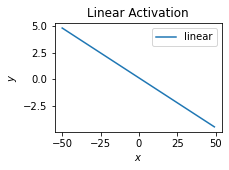

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(x.data.numpy(), y.data.numpy(), label="linear")
plt.title("Linear Activation")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

#### Non-Linearities Function (Activation Function)

Most used non-linear functions are: sigmoid, tanh and relu function.

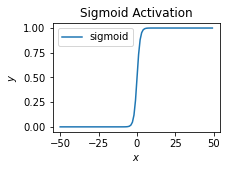

In [46]:
## sigmoid
y = torch.sigmoid(x)
fig, ax = plt.subplots(1,1, figsize=(3,2))
plt.plot(x.data.numpy(), y.data.numpy(), label="sigmoid")
plt.title("Sigmoid Activation")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

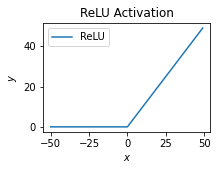

In [47]:
## Relu
fig, ax = plt.subplots(1,1, figsize=(3,2))
y = F.relu(x)
plt.plot(x.data.numpy(), y.data.numpy(), label="ReLU")
plt.title("ReLU Activation")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

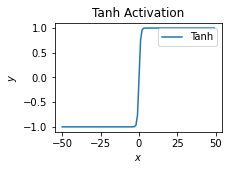

In [49]:
## Relu
fig, ax = plt.subplots(1,1, figsize=(3,2))
y = torch.tanh(x)
plt.plot(x.data.numpy(), y.data.numpy(), label="Tanh")
plt.title("Tanh Activation")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend();

### Other pytorch modules for defining neural networks

`torch.optim`: provides implementations of standard stochastic optimization techniques.

`torch.distributions`: contains parameterizable probability distributions and sampling functions.


##  Creating a neural network

To create a neural network in PyTorch, we use **nn.Module** base class with Python class inheritance which allows us to use all of the functionality of the **nn.Module base class**.

In [50]:
class Model(torch.nn.Module):

    def __init__(self, nb_feature, nb_output):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.fc1 = torch.nn.Linear(nb_feature, hidden_size) 
        self.fc2 = torch.nn.Linear(hidden_size, nb_output)  
        
        
    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x

- In the class definition, you can see the inheritance of the base class **torch.nn.Module**. 
- Then, in the first line of the class initialization (def __init__(self):) we have the required Python **super() function**, which creates an instance of the base **torch.nn.Module** class. 
- The next line define a linear object defined by **torch.nn.Linear**, with the first argument in the definition being the number of input feature and the next argument being the number of output.
- After that we need to define how data flows through out network. This can be doe using **forward()** method in which we supply the input data x as the primary argument. 

**PyTorch** offers an alternative easier and  more convenient way of creating neural networ using `torch.nn.Sequential` class. You can also define your own layers  and add them to the Sequential chain.

In [51]:
nb_feature = 2
hidden_size = 10
nb_output = 1
model_type_2 = torch.nn.Sequential(torch.nn.Linear(nb_feature, hidden_size),
                            torch.nn.ReLU(),
                            torch.nn.Linear(hidden_size, nb_output)
                           )

The next step is to create an instance of this network architecture and assign this instance to cuda() method if available. Suppose we have the following data.

In [52]:
# Create tensors.
x = torch.randn(10, 8)
y = torch.randn(10, 1)

In [53]:
model = Model(8, 1)
#move to device
model = model.to(device)
x = x.to(device)
y = y.to(device)

We can check the instance of our model:

In [54]:
print(model)

Model(
  (fc1): Linear(in_features=8, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


### Training the network
To train this model we need to setup an optimizer and a loss criterion:

In [55]:
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

- In the first line, we create a stochastic gradient descent optimizer, and we specify the learning rate and supply the model parameters using **model.parameters()** method of the base **torch.nn.Module** class that we inherit.
- Next, we set our loss criterion to be the **MSE** loss. For details on different loss function you may refer to [pytorch documentation](http://pytorch.org/docs/master/nn.html#loss-functions)

### In the training process:

- First we run optimizer.zero_grad() – this zeroes / resets all the gradients in the model, so that it is ready to go for the next back propagation pass. In other libraries this is performed implicitly, but in PyTorch you have to remember to do it explicitly.
- Then we we pass the input data into the model **pred = model(x)** – this will call the **forward()** method in our model class.
- After that we get the MSE loss between the output of our network and the target data as **loss = criterion(y_pred, y_data)**.

In [56]:
optimizer.zero_grad()
pred = model(x)
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  0.4534808099269867


- Then we runs a back-propagation operation from the loss Variable backwards through the network using **loss.backward()***
- Finaly we tell PyTorch to execute a gradient descent step based on the gradients calculated during the **.backward()** operation using **optimizer.step()**.


In [57]:
loss.backward()
optimizer.step()

###  Data loaders

PyTorch provides two classess the **Dataset class and the Dataloader class** that can be used to to feed  training data into the network.

**Dataset class** is used to provide an interface for accessing all the training or testing samples in your dataset. To achieve this, you have to implement two method, `__getitem__` and `__len__` so that each training sample  can be accessed by its index.

In [58]:
from torch.utils.data import Dataset, DataLoader


class customDataset(Dataset):
    """ custom dataset."""

    # Initialize your data, download, etc.
    def __init__(self, x, y):
        
        x = (x - x.mean(axis=0))/(x.std(axis=0))
        
        self.len = x.shape[0]
        self.x = torch.from_numpy(x).float()
        self.y = torch.from_numpy(y).float()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len


In [59]:
## Let us prepare data and define the dataset class
import pandas as pd
df = pd.read_csv("../data/pima/diabetes.csv")

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
target = ['Outcome']

inputs = df[features].as_matrix()
targets = df[target].as_matrix()

FileNotFoundError: [Errno 2] No such file or directory: '../data/pima/diabetes.csv'

In [ ]:
dataset = customDataset(x=inputs, y=targets)

#print length of the datasets
print(dataset.len)

The **Dataloader class** accept a dataset and other parameters such as **batch size** etc to load the data and so Then we can iterate over the Dataloader to get batches of training data and train your models. This class provides several important functionality for building deep learning models such as batching, shuffling, multiprocess data loading, etc

In [ ]:
data_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True)

##### To access data in data loader

In [ ]:
X_data, y_data=next(iter(data_loader))
X_data

To iterate through our data we use for loop as follows

In [ ]:
# for training purpose will 
for i, (x_data, y_data) in enumerate(data_loader, 0):
         if i ==2:
            print(x_data)
            print(y_data)
            break

In [ ]:
def train(model, optimizer, loss_fn,  device, data_loader, num_epochs, print_every=2):
    
    total_loss = []
    model.to(device)
    loss_fn.to(device)
    
    model.train()
    print("Start training")
    
    for epoch in range(num_epochs):
        
        training_loss = []
        
        for i, (inputs, targets) in enumerate(data_loader):
            
            inputs, targets = inputs.to(device), targets.to(device)
            
            optimizer.zero_grad()
            pred = model(inputs)
        
            # Calculate Loss: 
            loss = loss_fn(pred, targets)
            training_loss.append(loss.item())
            loss.backward()
            optimizer.step()
    
        total_loss.append(np.mean(training_loss))
        if epoch % print_every == 0:
          print('Train Epoch: {} [{}/{} ({:.0f}%)]  Loss: {:.6f}'.format(
                epoch+1, i * len(inputs), len(data_loader.dataset),
                100. * i / len(data_loader), np.mean(training_loss)))
    return total_loss

In [ ]:
train_loss = train(model, optimizer, criterion, device, data_loader, 1000, 50)

In [ ]:
plt.plot(train_loss)
plt.title("Training loss")
plt.xlabel("iterations")
plt.ylabel("Loss")


## References:

- [Adventures in machine learning](http://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/)
- [DeepLearningZeroToAll](https://github.com/hunkim/DeepLearningZeroToAll)
- [MILA welocome tutorial](https://github.com/mila-udem/welcome_tutorials/tree/master/pytorch)
- [PyTorch With Baby Steps: From y = x To Training A Convnet](http://lelon.io/blog/2018/02/08/pytorch-with-baby-steps)
- [How to Use Your Own Custom Dataset for Classification in PyTorch](https://jdhao.github.io/2017/10/23/pytorch-load-data-and-make-batch/)

<a name="myfootnote1">1</a>: http://pytorch.org/about/